## Define ROI masks examples

In [34]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import river.core.define_roi_masks as rm
import river.core.coordinate_transform as ct

x1_pix, y1_pix = 990, 1394
x2_pix, y2_pix = 2000, 1394
x1_rw, y1_rw = 0, 0
x2_rw, y2_rw = 100, 0

In [35]:
transformation_matrix = ct.get_uav_transformation_matrix(x1_pix, y1_pix, x2_pix, y2_pix, x1_rw, y1_rw, x2_rw, y2_rw)

### Input coordinates of the line and height of the rectangle CS

In [3]:
east_left = 10
north_left = 10
east_right = 100
north_right = 0
height_roi = 20

### Create the rectangular box and get the image with the box

In [4]:
rw_box = rm.create_rw_box(east_left, north_left, east_right, north_right, height_roi)

### Create a polygon for the rectangle

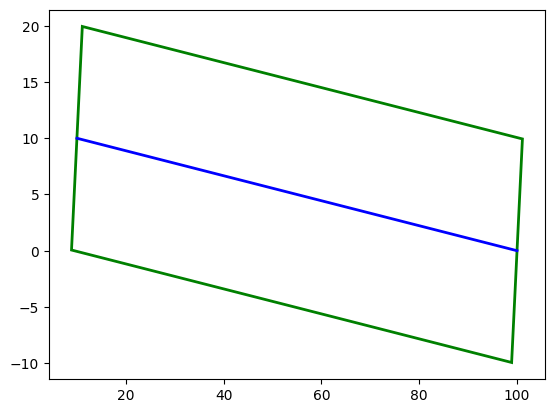

In [ ]:
fig, ax = plt.subplots(1)
ax.plot([east_left, east_right], [north_left, north_right], color='blue', linewidth=2, label='Line')
polygon = patches.Polygon(rw_box, closed=True, edgecolor='green', facecolor='none', linewidth=2, label='Rectangular Box')
ax.add_patch(polygon)


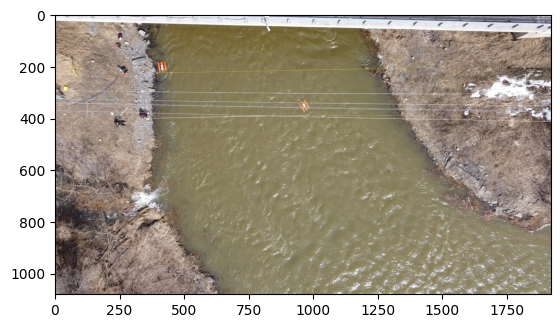

In [12]:
image = plt.imread('0000000001.jpg')
fig, ax = plt.subplots(1)
ax.imshow(image)

In [36]:
pixel_box = rm.rw_box_to_pixel(rw_box, transformation_matrix)

ax.plot([x1_pix, x2_pix], [y1_pix, y2_pix], color='red', linewidth=2, label='Line')

# # Create a polygon for the rectangle
polygon = patches.Polygon(pixel_box, closed=True, edgecolor='blue', facecolor='none', linewidth=2, label='Rectangular Box')
ax.add_patch(polygon)

In [37]:
xsections = json.loads(Path('xsections.json').read_text())

In [38]:
mask = rm.create_mask(image, pixel_box)
ax.imshow(mask)

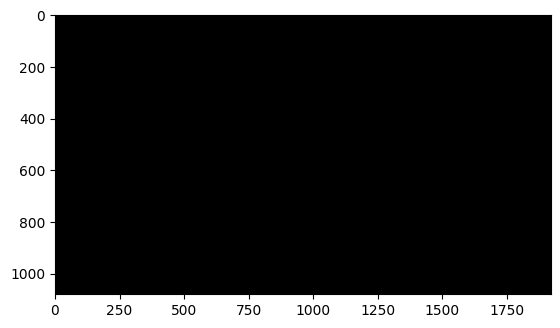

In [31]:
combined_mask, bbox = rm.create_mask_and_bbox(image, xsections, transformation_matrix, height_roi)
fig, ax = plt.subplots()
ax.imshow(combined_mask, cmap='gray')

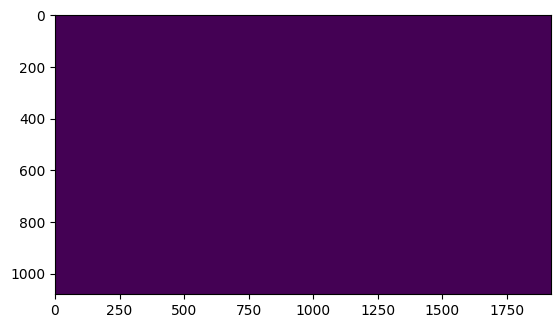

In [39]:
lenghts_bbox = rm.calculate_side_lengths(pixel_box)
combined_mask, bbox = rm.create_mask_and_bbox(image, xsections, transformation_matrix, height_roi)
plt.imshow(combined_mask)

In [40]:
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3], linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

In [22]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)